In [50]:
import requests
import pandas as pd
import json
import datetime
from datetime import datetime as dt
import time

### Collecting data (Task - 5)

In [54]:
key = "pk_0ba0b28e021743c9a9ca74377d5b0e7c"
ticker = "aapl"

prev_yr = "https://cloud.iexapis.com/stable/stock/"+ticker+"/chart/1y?token="+key
prev_day = "https://cloud.iexapis.com/stable/stock/"+ticker+"/chart/1d?token="+key
pres_day = "https://cloud.iexapis.com/stable/stock/"+ticker+"/intraday-prices/batch?token="+key

data_py = requests.get(prev_yr)
data_pd = requests.get(prev_day)
data_psd = requests.get(pres_day)

jsn_py = json.loads(data_py.text)
jsn_pd = json.loads(data_pd.text)
jsn_psd = json.loads(data_psd.text)

for i in jsn_py:
    i['minute'] = i.get('minute','09:30')

for i in jsn_py:
        string = i['date']+'T'+i['minute']+':00+00:00'
        element= dt.strptime(string,"%Y-%m-%dT%H:%M:%S+00:00")
        tuple = element.timetuple() 
        timestamp = time.mktime(tuple)
        i['timestamps']= i.get('timestamps',timestamp)

for i in jsn_pd:
        string = i['date']+'T'+i['minute']+':00+00:00'
        element= dt.strptime(string,"%Y-%m-%dT%H:%M:%S+00:00")
        tuple = element.timetuple() 
        timestamp = time.mktime(tuple)
        i['timestamps']= i.get('timestamps',timestamp)

for i in jsn_psd:
        string = i['date']+'T'+i['minute']+':00+00:00'
        element= dt.strptime(string,"%Y-%m-%dT%H:%M:%S+00:00")
        tuple = element.timetuple() 
        timestamp = time.mktime(tuple)
        i['timestamps']= i.get('timestamps',timestamp)

df_py= pd.DataFrame(jsn_py)
df_pd= pd.DataFrame(jsn_pd)
df_psd= pd.DataFrame(jsn_psd)

stock = pd.concat([df_py, df_pd, df_psd])
stock = stock.drop(['close','high','low','volume','uOpen','uHigh','uLow','uVolume','change','label','changeOverTime','uClose','minute','date','changePercent','average','notional','numberOfTrades'],axis=1)
stock = stock.dropna()

c:\python27\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
array = stock.values
X = array[:,1]
X = X.reshape(-1,1)
y = array[:,0]

In [57]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2, random_state=3)

In [58]:
models = []
models.append((' LR ', LinearRegression()))
models.append((' LASSO ', Lasso()))
models.append((' EN ', ElasticNet()))
models.append((' KNN ', KNeighborsRegressor()))
models.append((' CART ', DecisionTreeRegressor()))
models.append((' SVR ', SVR()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=3, random_state=1, shuffle=True)
    cv_score = cross_val_score(
        model, X_train, y_train, cv=kfold, scoring='r2')
    results.append(cv_score)
    names.append(name)
    scores = "%s: %f (%f)" % (name, cv_score.mean(), cv_score.std())
    print(scores)

 LR : 0.907492 (0.015514)
 LASSO : 0.907492 (0.015514)
 EN : 0.907492 (0.015514)
 KNN : 0.993213 (0.000289)
 CART : 0.993998 (0.002351)
 SVR : -0.187267 (0.023289)


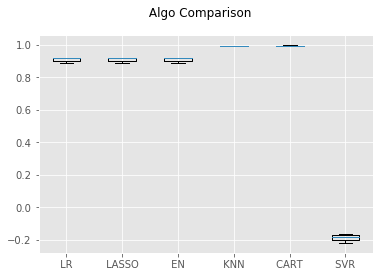

In [59]:
fig = plt.figure()
fig.suptitle(' Algo Comparison ')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [70]:
model = DecisionTreeRegressor(max_depth=20)
model.fit(X_train, y_train)

predictions = model.predict(X_val)
print(r2_score(y_val, predictions))

0.9934124513980235


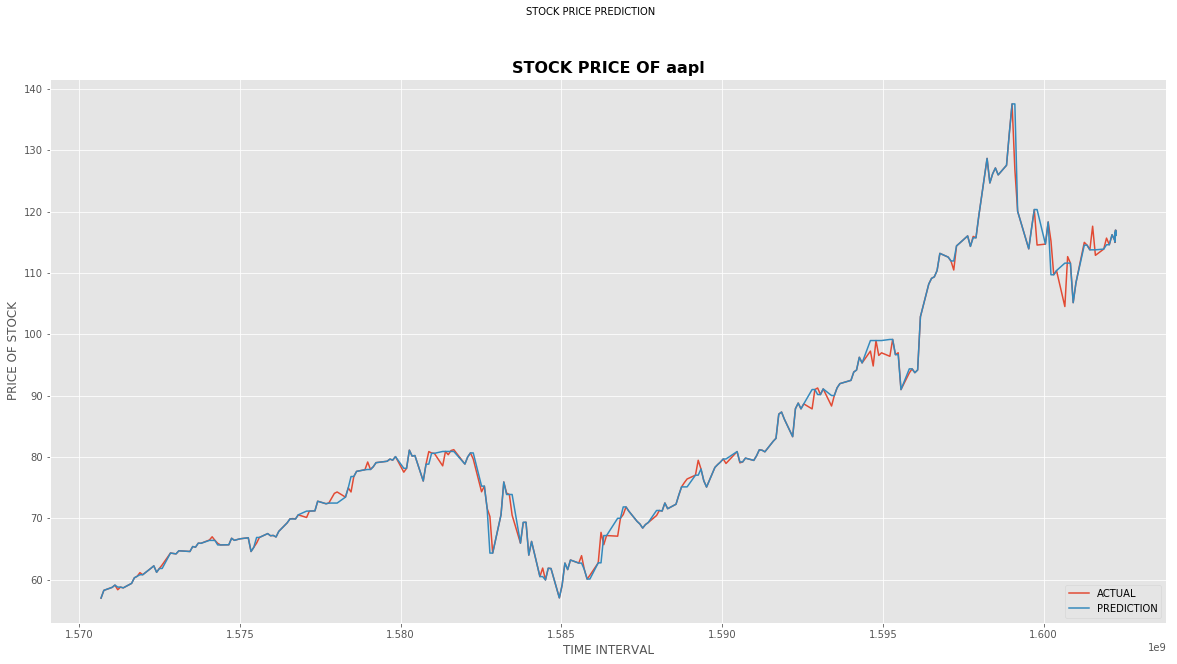

In [71]:
figure = plt.figure(figsize=(20,10))
plt.plot(X, y, label="ACTUAL")
plt.plot(X, model.predict(X.reshape(-1,1)), label="PREDICTION")
plt.legend(loc='lower right')
plt.title("STOCK PRICE OF "+ ticker, fontsize=16, fontweight='bold')
plt.suptitle("STOCK PRICE PREDICTION", fontsize=10)
plt.xlabel("TIME INTERVAL")
plt.ylabel("PRICE OF STOCK")
plt.show()